<a href="https://colab.research.google.com/github/mojodean/aai-530-final-project/blob/vperng/530_IoT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Colab compatibility
from google.colab import drive
drive.mount('/content/drive')
!pip install opendatasets

Mounted at /content/drive


In [3]:
# Import Libraries
import opendatasets as od
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Exploration

In [4]:
# Download path
download_path = '/content/drive/MyDrive/Colab Notebooks/530-IoT-Project'
os.chdir(download_path)

# # Load dataset from Kaggle
# od.download("https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information?resource=download",
#             data_dir=download_path)

In [5]:
# File path
file_path = os.path.join(download_path, "smart-home-dataset-with-weather-information/HomeC.csv")

# Load dataset into DataFrame
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
# Print first 5 rows
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
# Print last 5 rows
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Inspect missing values and type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

<Axes: >

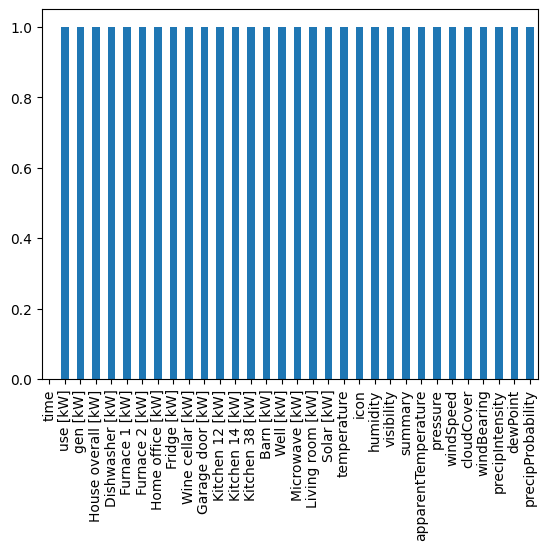

In [ ]:
# Plot missing value counts
df.isnull().sum().plot.bar()

In [6]:
# Remove missing data since it is only 1 row (last row)
df = df.dropna()

df.isnull().sum()

,0
time,0
use [kW],0
gen [kW],0
House overall [kW],0
Dishwasher [kW],0
Furnace 1 [kW],0
Furnace 2 [kW],0
Home office [kW],0
Fridge [kW],0
Wine cellar [kW],0


In [ ]:
# Summary statistics
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [7]:
# Convert UNIX time to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='s')
df['datetime'].head()

<ipython-input-7-829b5d54a1ba>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['datetime'] = pd.to_datetime(df['time'], unit='s')


,datetime
0,2016-01-01 05:00:00
1,2016-01-01 05:00:01
2,2016-01-01 05:00:02
3,2016-01-01 05:00:03
4,2016-01-01 05:00:04


In [8]:
# Dataset creator mentioned that the timesteps are meant to be per min instead of sec
# Convert to 1 minute intervals
df['datetime'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00',
                                                periods=len(df),
                                                freq='min'))
df['datetime'].head(5)

,datetime
0,2016-01-01 05:00:00
1,2016-01-01 05:01:00
2,2016-01-01 05:02:00
3,2016-01-01 05:03:00
4,2016-01-01 05:04:00


In [ ]:
df['datetime'].describe()

,datetime
count,503910
mean,2016-06-24 04:14:30.000001280
min,2016-01-01 05:00:00
25%,2016-03-28 16:37:15
50%,2016-06-24 04:14:30
75%,2016-09-19 15:51:45
max,2016-12-16 03:29:00


In [ ]:
# Columns of interest
home_apps = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'House overall [kW]',
             'temperature']

<ipython-input-31-7754217eea85>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()


Text(0.5, 0.9, 'Monthly Averages for Home Applications')

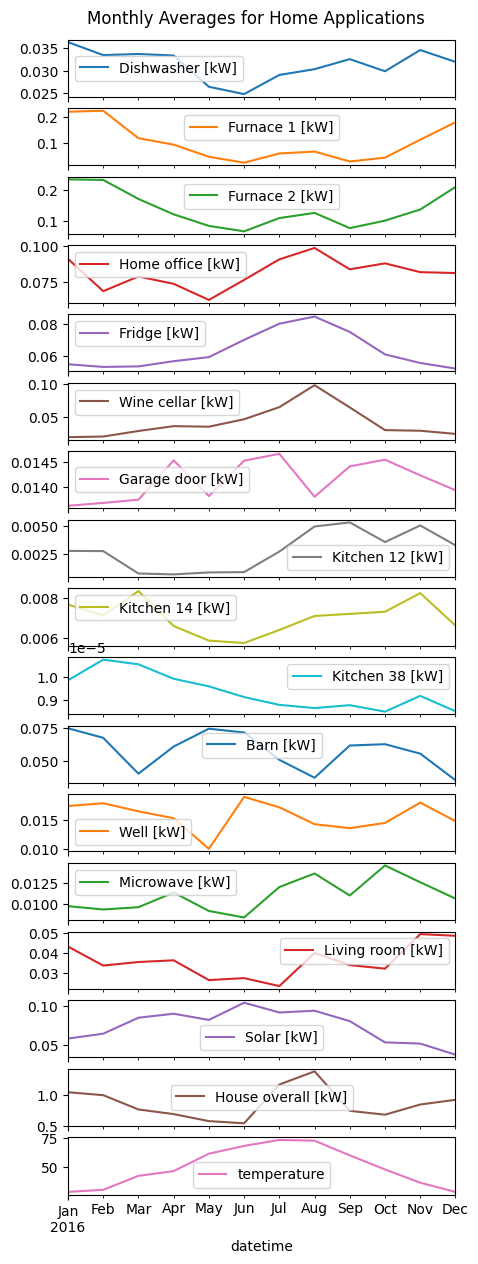

In [ ]:
# Create line plots using monthly average of each feature
monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()
monthly_avg.plot(y=home_apps, subplots=True, figsize=(5,15))
plt.suptitle("Monthly Averages for Home Applications", y=0.9)



In [ ]:
monthly_avg.head()

,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],House overall [kW],temperature
datetime,,,,,,,,,,,,,,,,,
2016-01-31,0.036391,0.221591,0.235614,0.091203,0.054945,0.018962,0.013646,0.002758,0.007653,0.000010,0.074741,0.017278,0.009687,0.043328,0.058560,1.043215,28.721361
2016-02-29,0.033503,0.225371,0.233713,0.068263,0.053283,0.019935,0.013701,0.002737,0.007114,0.000011,0.067462,0.017746,0.009292,0.033737,0.064756,0.995164,30.472338
2016-03-31,0.033748,0.120040,0.172221,0.078668,0.053609,0.028416,0.013763,0.000697,0.008329,0.000011,0.040141,0.016394,0.009563,0.035528,0.085032,0.762251,42.423383
2016-04-30,0.033412,0.095146,0.122305,0.073455,0.056828,0.035844,0.014524,0.000615,0.006584,0.000010,0.060805,0.015240,0.011308,0.036382,0.090128,0.686640,46.511224
2016-05-31,0.026452,0.048578,0.084887,0.062029,0.059334,0.034979,0.013834,0.000795,0.005856,0.000010,0.074412,0.010102,0.009116,0.026413,0.082229,0.572376,61.404635


Text(0.5, 0.9, '30-Day Moving Averages for Home Applications')

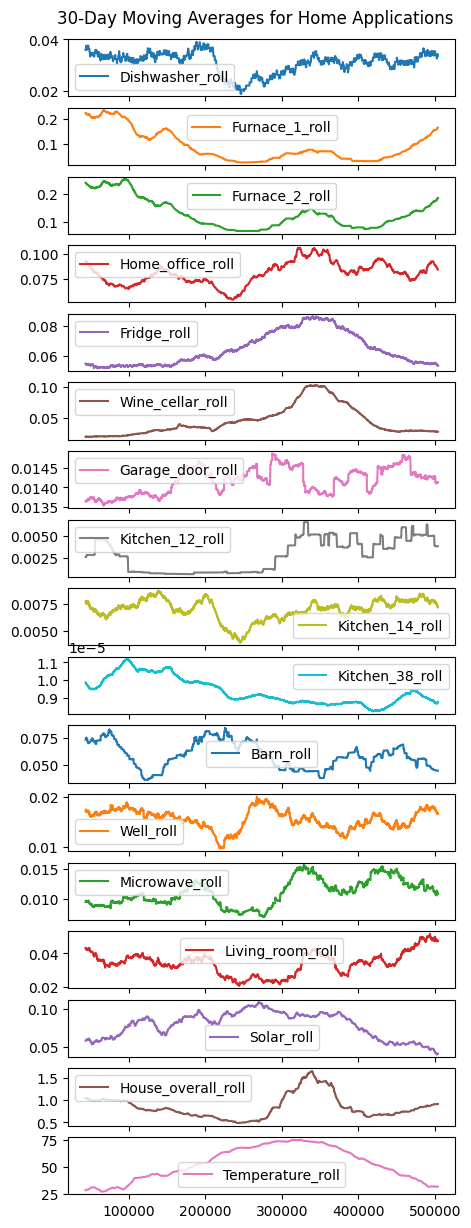

In [ ]:
# Create line plots of 30-day moving average
columns_rolling = ['Dishwasher_roll',
                   'Furnace_1_roll',
                   'Furnace_2_roll',
                   'Home_office_roll',
                   'Fridge_roll',
                   'Wine_cellar_roll',
                   'Garage_door_roll',
                   'Kitchen_12_roll',
                   'Kitchen_14_roll',
                   'Kitchen_38_roll',
                   'Barn_roll',
                   'Well_roll',
                   'Microwave_roll',
                   'Living_room_roll',
                   'Solar_roll',
                   'House_overall_roll',
                   'Temperature_roll'
                   ]

df[columns_rolling] = df[home_apps].rolling(43200).mean()
df.plot(y=columns_rolling, subplots=True, figsize=(5,15))
plt.suptitle("30-Day Moving Averages for Home Applications", y=0.9)

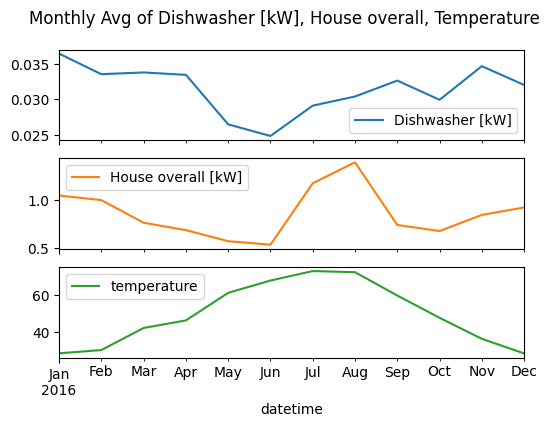

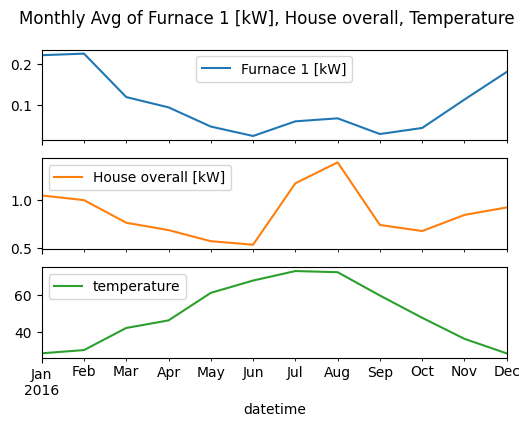

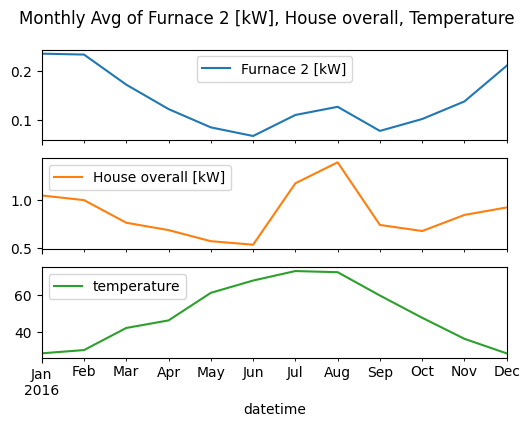

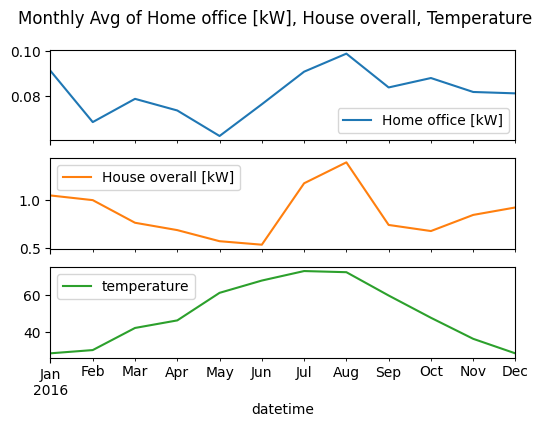

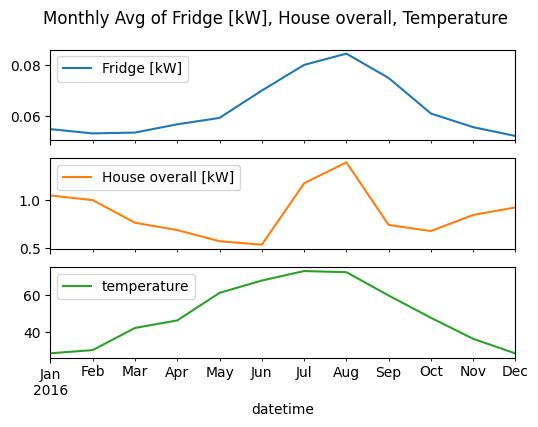

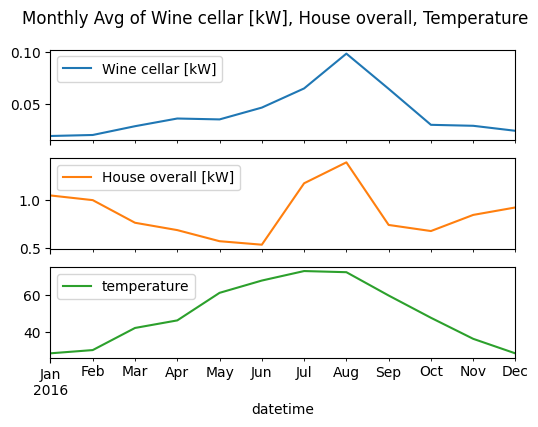

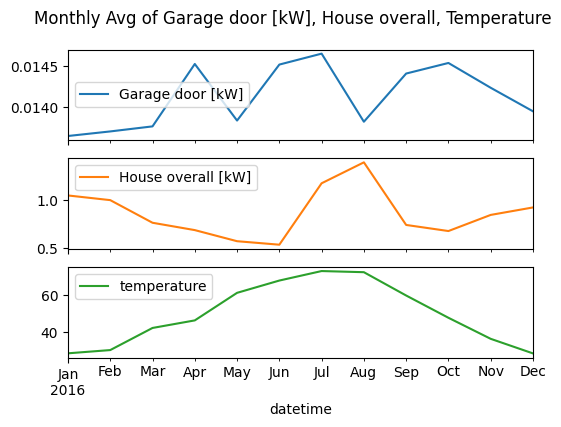

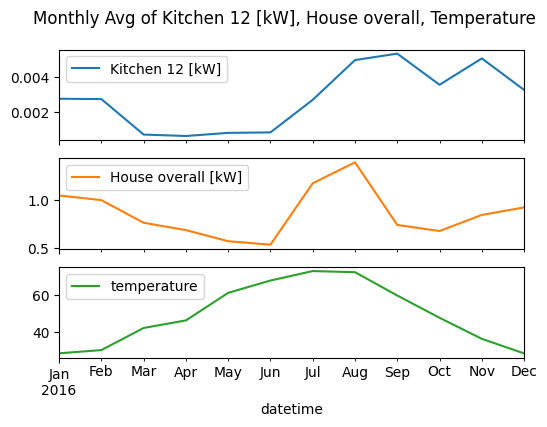

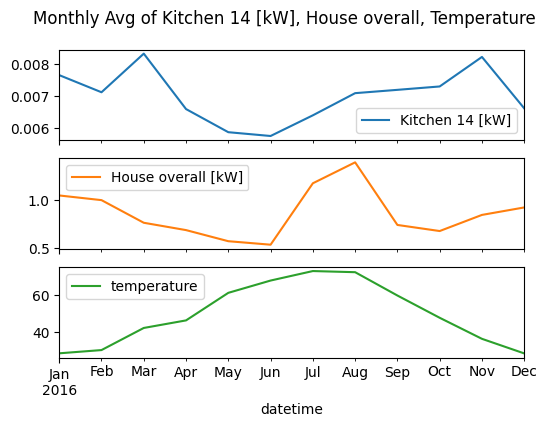

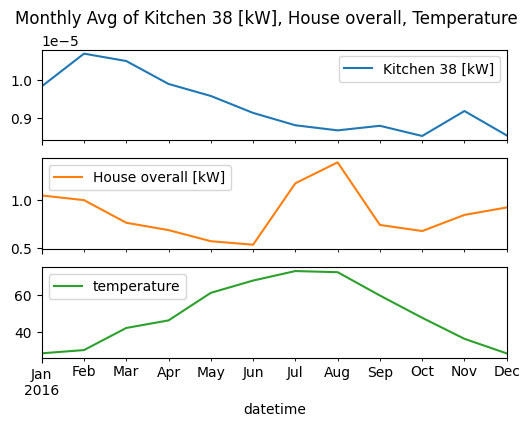

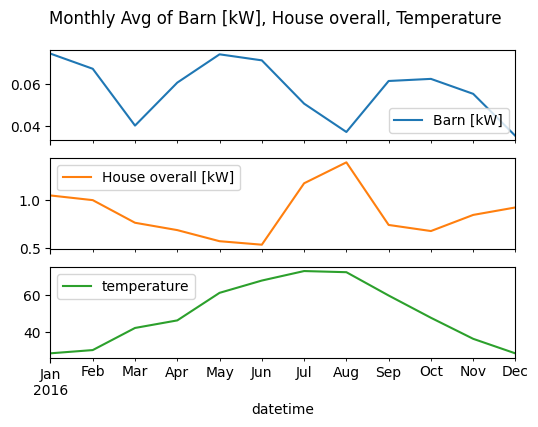

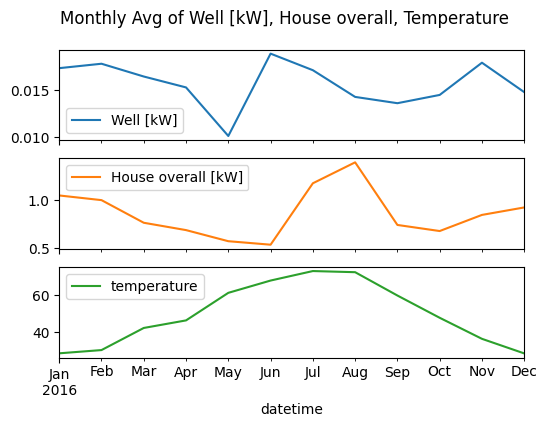

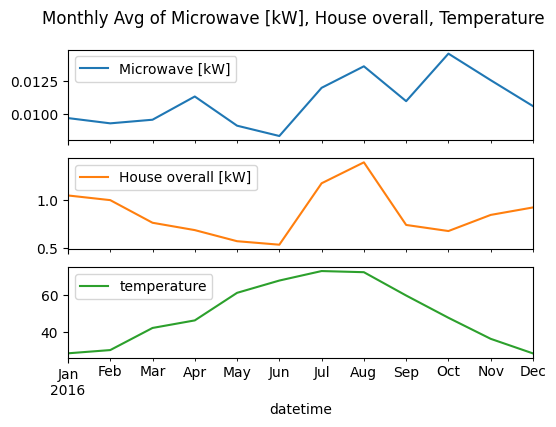

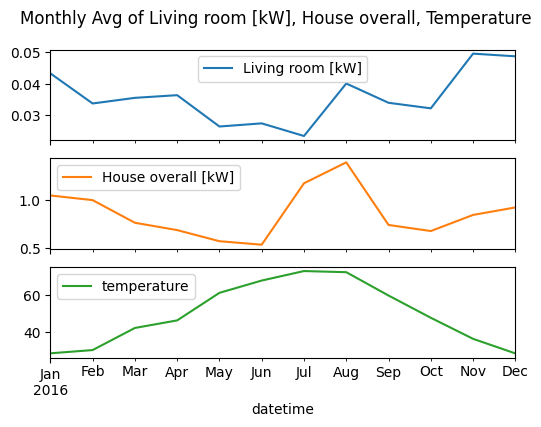

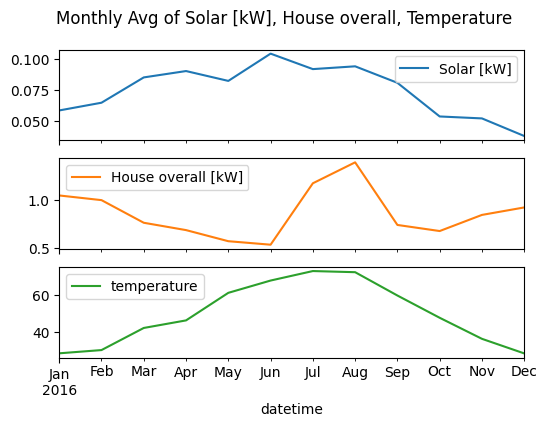

In [ ]:
for col in home_apps[:-2]:
    monthly_avg.plot(y=[col, 'House overall [kW]','temperature'],
                     subplots=True,
                     figsize=(6,4))
    plt.suptitle(f"Monthly Avg of {col}, House overall, Temperature")

In [ ]:
# Continuous features
cont_feat = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'temperature',
             'humidity',
             'visibility',
             'apparentTemperature',
             'pressure',
             'windSpeed',
             'windBearing',
             'precipIntensity',
             'dewPoint',
             'precipProbability',
             'House overall [kW]',
             ]


Text(0.5, 1.0, 'Correlation Matrix between Continuous Features')

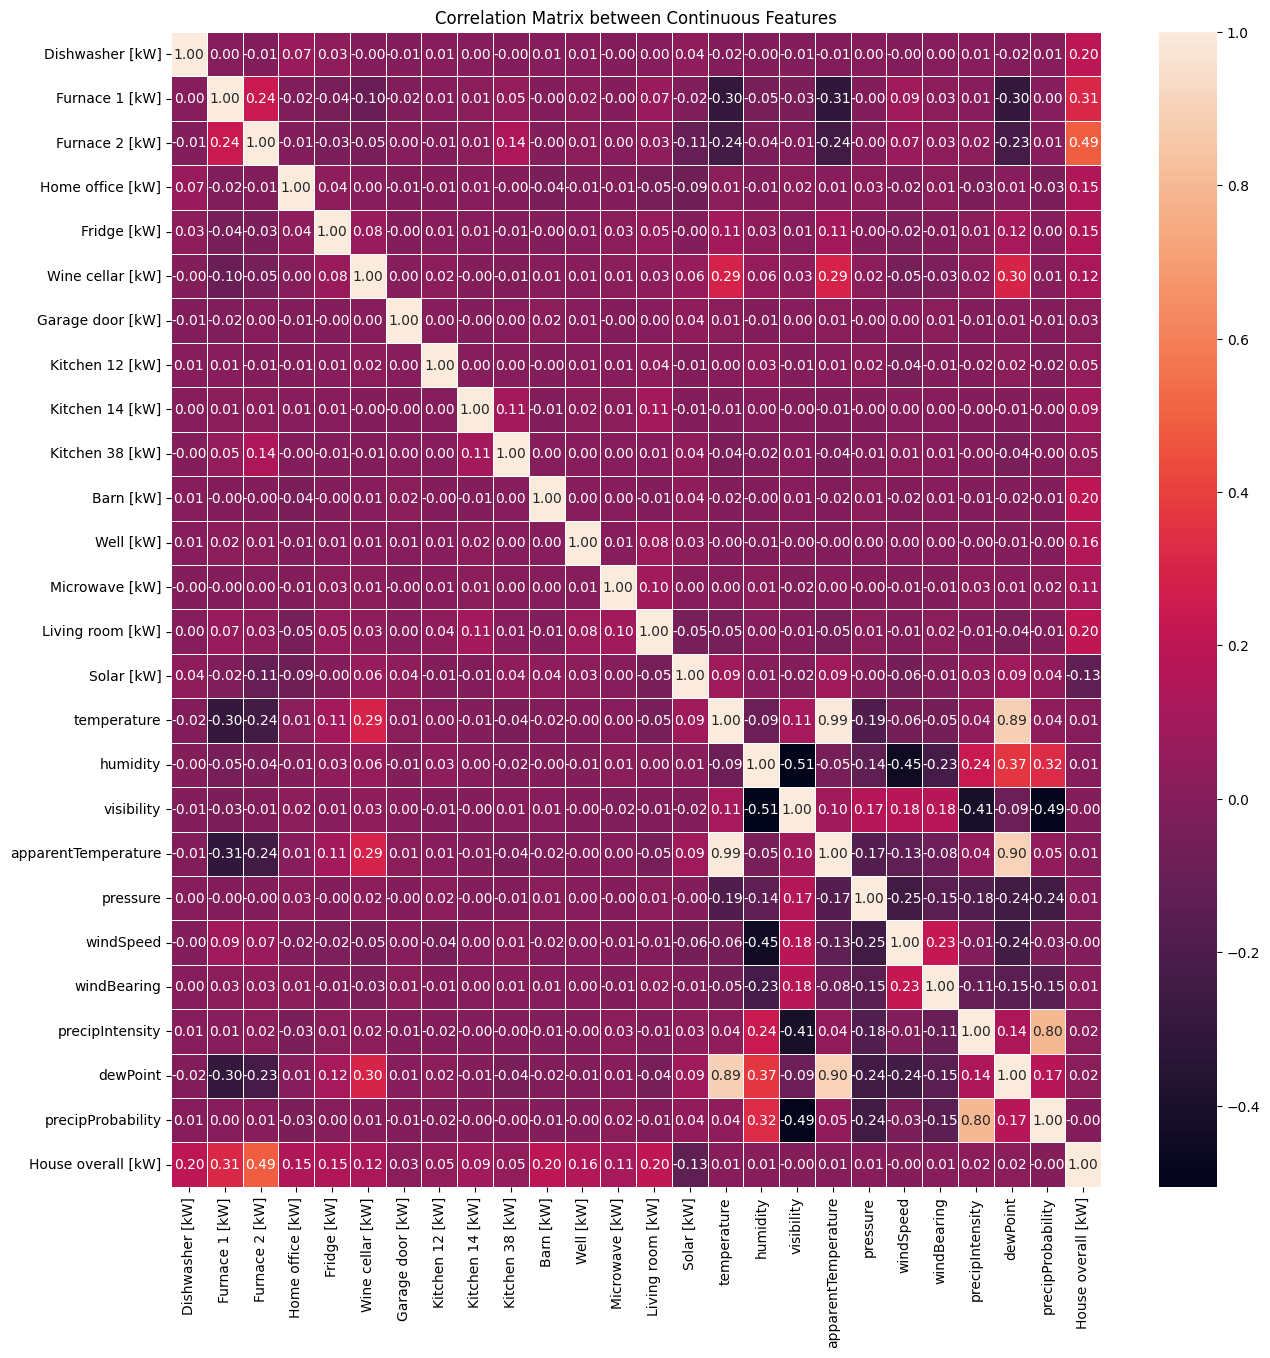

In [ ]:
correlation_matrix = df[cont_feat].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Continuous Features')


# Data Preprocessing - AutoEncoder

In [9]:
# Make copy of dataframe with features selected
selected_features = ['datetime',
                     'House overall [kW]',
                     'Furnace 1 [kW]',
                     'Furnace 2 [kW]',
                     'Home office [kW]',
                     'Fridge [kW]',
                     'Wine cellar [kW]',
                     'Living room [kW]',
                     'temperature'
]

df_work = df[selected_features].copy()
df_work.head()

,datetime,House overall [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Living room [kW],temperature
0,2016-01-01 05:00:00,0.932833,0.020700,0.061917,0.442633,0.124150,0.006983,0.001517,36.14
1,2016-01-01 05:01:00,0.934333,0.020717,0.063817,0.444067,0.124000,0.006983,0.001650,36.14
2,2016-01-01 05:02:00,0.931817,0.020700,0.062317,0.446067,0.123533,0.006983,0.001650,36.14
3,2016-01-01 05:03:00,1.022050,0.106900,0.068517,0.446583,0.123133,0.006983,0.001617,36.14
4,2016-01-01 05:04:00,1.139400,0.236933,0.063983,0.446533,0.122850,0.006850,0.001583,36.14


In [10]:
# Extract useful features from datetime
df_work['hour'] = df['datetime'].dt.hour
df_work['day_of_week'] = df['datetime'].dt.dayofweek
df_work['month'] = df['datetime'].dt.month


In [11]:
# Combine Furnace 1 and Furnace 2 to one feature
df_work['Total Furnace'] = df_work['Furnace 1 [kW]'] + df_work['Furnace 2 [kW]']

In [12]:
# List of features for energy consumption
energy_features = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

In [13]:
# Feature Engineering - 1 hr rolling statistics for energy consumption data
rolling_window = 60
for col in energy_features:
  df_work[f'rolling_mean_{col}'] = df_work[col].rolling(rolling_window).mean()
  df_work[f'rolling_std_{col}'] = df_work[col].rolling(rolling_window).std()


In [14]:
# Feature Engineering - Appliance-to-total ratios
appliances = [
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

# Set a minimum threshold so that ratio does not go to infinity
threshold = 0.01
df_work['House_w_threshold'] = df_work['House overall [kW]'].apply(lambda x: max(x, threshold))

# Calculate ratio of appliance energy consumption to house overall consumption
for app in appliances:
  df_work[f'{app}_ratio'] = df_work[app] / df_work['House_w_threshold']


In [15]:
df_work.head()

,datetime,House overall [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Living room [kW],temperature,hour,day_of_week,month,Total Furnace,rolling_mean_House overall [kW],rolling_std_House overall [kW],rolling_mean_Total Furnace,rolling_std_Total Furnace,rolling_mean_Home office [kW],rolling_std_Home office [kW],rolling_mean_Fridge [kW],rolling_std_Fridge [kW],rolling_mean_Wine cellar [kW],rolling_std_Wine cellar [kW],rolling_mean_Living room [kW],rolling_std_Living room [kW],House_w_threshold,Total Furnace_ratio,Home office [kW]_ratio,Fridge [kW]_ratio,Wine cellar [kW]_ratio,Living room [kW]_ratio
0,2016-01-01 05:00:00,0.932833,0.020700,0.061917,0.442633,0.124150,0.006983,0.001517,36.14,5,4,1,0.082617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.932833,0.088565,0.474504,0.133089,0.007486,0.001626
1,2016-01-01 05:01:00,0.934333,0.020717,0.063817,0.444067,0.124000,0.006983,0.001650,36.14,5,4,1,0.084533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934333,0.090474,0.475276,0.132715,0.007474,0.001766
2,2016-01-01 05:02:00,0.931817,0.020700,0.062317,0.446067,0.123533,0.006983,0.001650,36.14,5,4,1,0.083017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931817,0.089091,0.478706,0.132573,0.007494,0.001771
3,2016-01-01 05:03:00,1.022050,0.106900,0.068517,0.446583,0.123133,0.006983,0.001617,36.14,5,4,1,0.175417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022050,0.171632,0.436949,0.120477,0.006833,0.001582
4,2016-01-01 05:04:00,1.139400,0.236933,0.063983,0.446533,0.122850,0.006850,0.001583,36.14,5,4,1,0.300917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.139400,0.264101,0.391902,0.107820,0.006012,0.001390


In [16]:
df_work.describe()

,datetime,House overall [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Living room [kW],temperature,hour,day_of_week,month,Total Furnace,rolling_mean_House overall [kW],rolling_std_House overall [kW],rolling_mean_Total Furnace,rolling_std_Total Furnace,rolling_mean_Home office [kW],rolling_std_Home office [kW],rolling_mean_Fridge [kW],rolling_std_Fridge [kW],rolling_mean_Wine cellar [kW],rolling_std_Wine cellar [kW],rolling_mean_Living room [kW],rolling_std_Living room [kW],House_w_threshold,Total Furnace_ratio,Home office [kW]_ratio,Fridge [kW]_ratio,Wine cellar [kW]_ratio,Living room [kW]_ratio
count,503910,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503851.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,2016-06-24 04:14:30.000001280,0.858962,0.099210,0.136779,0.081287,0.063556,0.042137,0.035313,50.741935,11.501399,2.999821,6.268381,0.235989,0.858902,0.434377,0.235945,0.126442,0.081275,0.017022,0.063559,0.053909,0.042139,0.018928,0.035313,0.020197,0.858986,0.444025,0.205007,0.136540,0.116272,0.040735
min,2016-01-01 05:00:00,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000000,-12.640000,0.000000,0.000000,1.000000,0.000300,0.000800,0.000000,0.000300,0.000000,0.000083,0.000000,0.000100,0.000000,0.000017,0.000000,0.000000,0.000000,0.010000,0.007288,0.002724,0.000303,0.000498,0.000000
25%,2016-03-28 16:37:15,0.367667,0.020233,0.064400,0.040383,0.005083,0.007133,0.001483,35.770000,6.000000,1.000000,3.000000,0.085300,0.428468,0.113888,0.087000,0.001344,0.040605,0.000125,0.035832,0.045409,0.007321,0.000171,0.001512,0.000069,0.367667,0.151881,0.054756,0.010465,0.010469,0.001951
50%,2016-06-24 04:14:30,0.562333,0.020617,0.066633,0.042217,0.005433,0.008083,0.001617,50.320000,12.000000,3.000000,6.000000,0.088950,0.673487,0.300708,0.125877,0.057532,0.042511,0.000320,0.056210,0.057782,0.014844,0.000621,0.001632,0.000100,0.562333,0.245930,0.093815,0.028377,0.022595,0.003452
75%,2016-09-19 15:51:45,0.970250,0.068733,0.080633,0.068283,0.125417,0.053192,0.001750,66.260000,18.000000,5.000000,9.000000,0.219417,1.021207,0.474203,0.343789,0.247749,0.074785,0.010290,0.081400,0.061435,0.074324,0.047320,0.001930,0.000267,0.970250,0.471265,0.162905,0.186119,0.094537,0.006171
max,2016-12-16 03:29:00,14.714567,1.934083,0.794933,0.971750,0.851267,1.273933,0.465217,93.720000,23.000000,6.000000,12.000000,2.472633,10.097399,4.969551,1.183220,0.795577,0.679508,0.314711,0.398228,0.266325,1.120965,0.544799,0.377364,0.196730,14.714567,27.968333,16.913333,15.073333,16.023333,17.471667
std,NaN,1.058207,0.169059,0.178631,0.104466,0.076199,0.057967,0.096056,19.113807,6.922017,2.000136,3.319007,0.273885,0.803259,0.542220,0.202408,0.136416,0.094036,0.042574,0.043507,0.032769,0.047552,0.027560,0.080749,0.048419,1.058188,0.924810,0.536464,0.434478,0.475892,0.144479


In [17]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   datetime                         503910 non-null  datetime64[ns]
 1   House overall [kW]               503910 non-null  float64       
 2   Furnace 1 [kW]                   503910 non-null  float64       
 3   Furnace 2 [kW]                   503910 non-null  float64       
 4   Home office [kW]                 503910 non-null  float64       
 5   Fridge [kW]                      503910 non-null  float64       
 6   Wine cellar [kW]                 503910 non-null  float64       
 7   Living room [kW]                 503910 non-null  float64       
 8   temperature                      503910 non-null  float64       
 9   hour                             503910 non-null  int32         
 10  day_of_week                      503910 non-null 

In [18]:
# Remove missing 59 data from creating rolling statistics
df_work = df_work.dropna()

df_work.isnull().sum()

,0
datetime,0
House overall [kW],0
Furnace 1 [kW],0
Furnace 2 [kW],0
Home office [kW],0
Fridge [kW],0
Wine cellar [kW],0
Living room [kW],0
temperature,0
hour,0


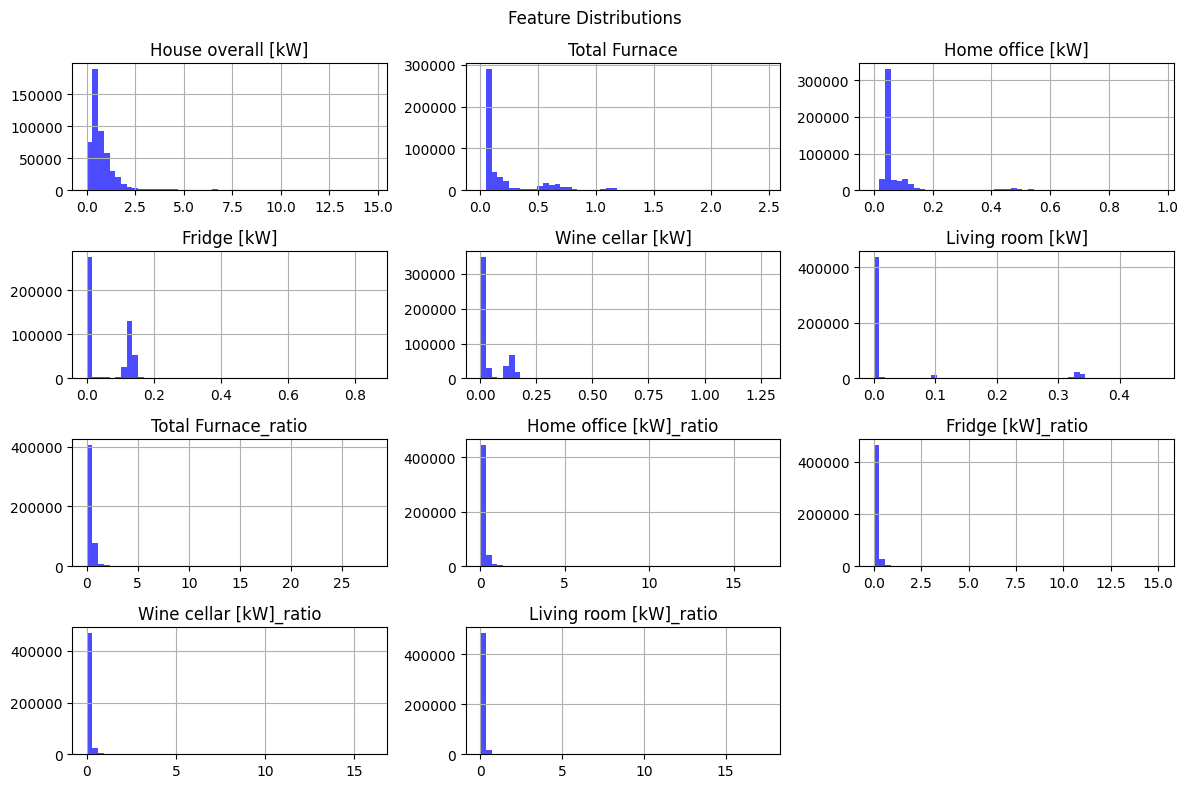

In [19]:
# Numerical columns
features_to_check = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
    'Total Furnace_ratio',
    'Home office [kW]_ratio',
    'Fridge [kW]_ratio',
    'Wine cellar [kW]_ratio',
    'Living room [kW]_ratio'
]

# Plot histograms
df_work[features_to_check].hist(figsize=(12, 8), bins=50, color='blue', alpha=0.7)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()


In [20]:
# List of final features
exclude = ['datetime', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'House_w_threshold']
final_features = [col for col in df_work.columns if col not in exclude]
print(final_features)

['House overall [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Living room [kW]', 'temperature', 'hour', 'day_of_week', 'month', 'Total Furnace', 'rolling_mean_House overall [kW]', 'rolling_std_House overall [kW]', 'rolling_mean_Total Furnace', 'rolling_std_Total Furnace', 'rolling_mean_Home office [kW]', 'rolling_std_Home office [kW]', 'rolling_mean_Fridge [kW]', 'rolling_std_Fridge [kW]', 'rolling_mean_Wine cellar [kW]', 'rolling_std_Wine cellar [kW]', 'rolling_mean_Living room [kW]', 'rolling_std_Living room [kW]', 'Total Furnace_ratio', 'Home office [kW]_ratio', 'Fridge [kW]_ratio', 'Wine cellar [kW]_ratio', 'Living room [kW]_ratio']


In [21]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create copy of original dataframe
df_scaled = df_work[final_features].copy()

# Fit and transform the data
df_scaled[final_features[1:]] = scaler.fit_transform(df_scaled[final_features[1:]])

In [22]:
# Ensure data maintains temporal order
df_scaled = df_scaled.sort_index()

# Define split point for 70-30 train/test split
split_point = int(len(df_scaled) * 0.7)

# Split data
X_train = df_scaled.iloc[:split_point] # First 70% of the data
X_test = df_scaled.iloc[split_point:] # Last 30% of the data

# Create validation set from test set
split_point_val = int(len(X_test) * 0.5)
X_val = X_test.iloc[:split_point_val] # First 50% of test set
X_test = X_test.iloc[split_point_val:] # Second 50% of test set

# Print shapes of each set
print(f'Training data shape: {X_train.shape}')
print(f'Validation data shape: {X_val.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (352695, 27)
Validation data shape: (75578, 27)
Testing data shape: (75578, 27)


# Model Training - Autoencoder

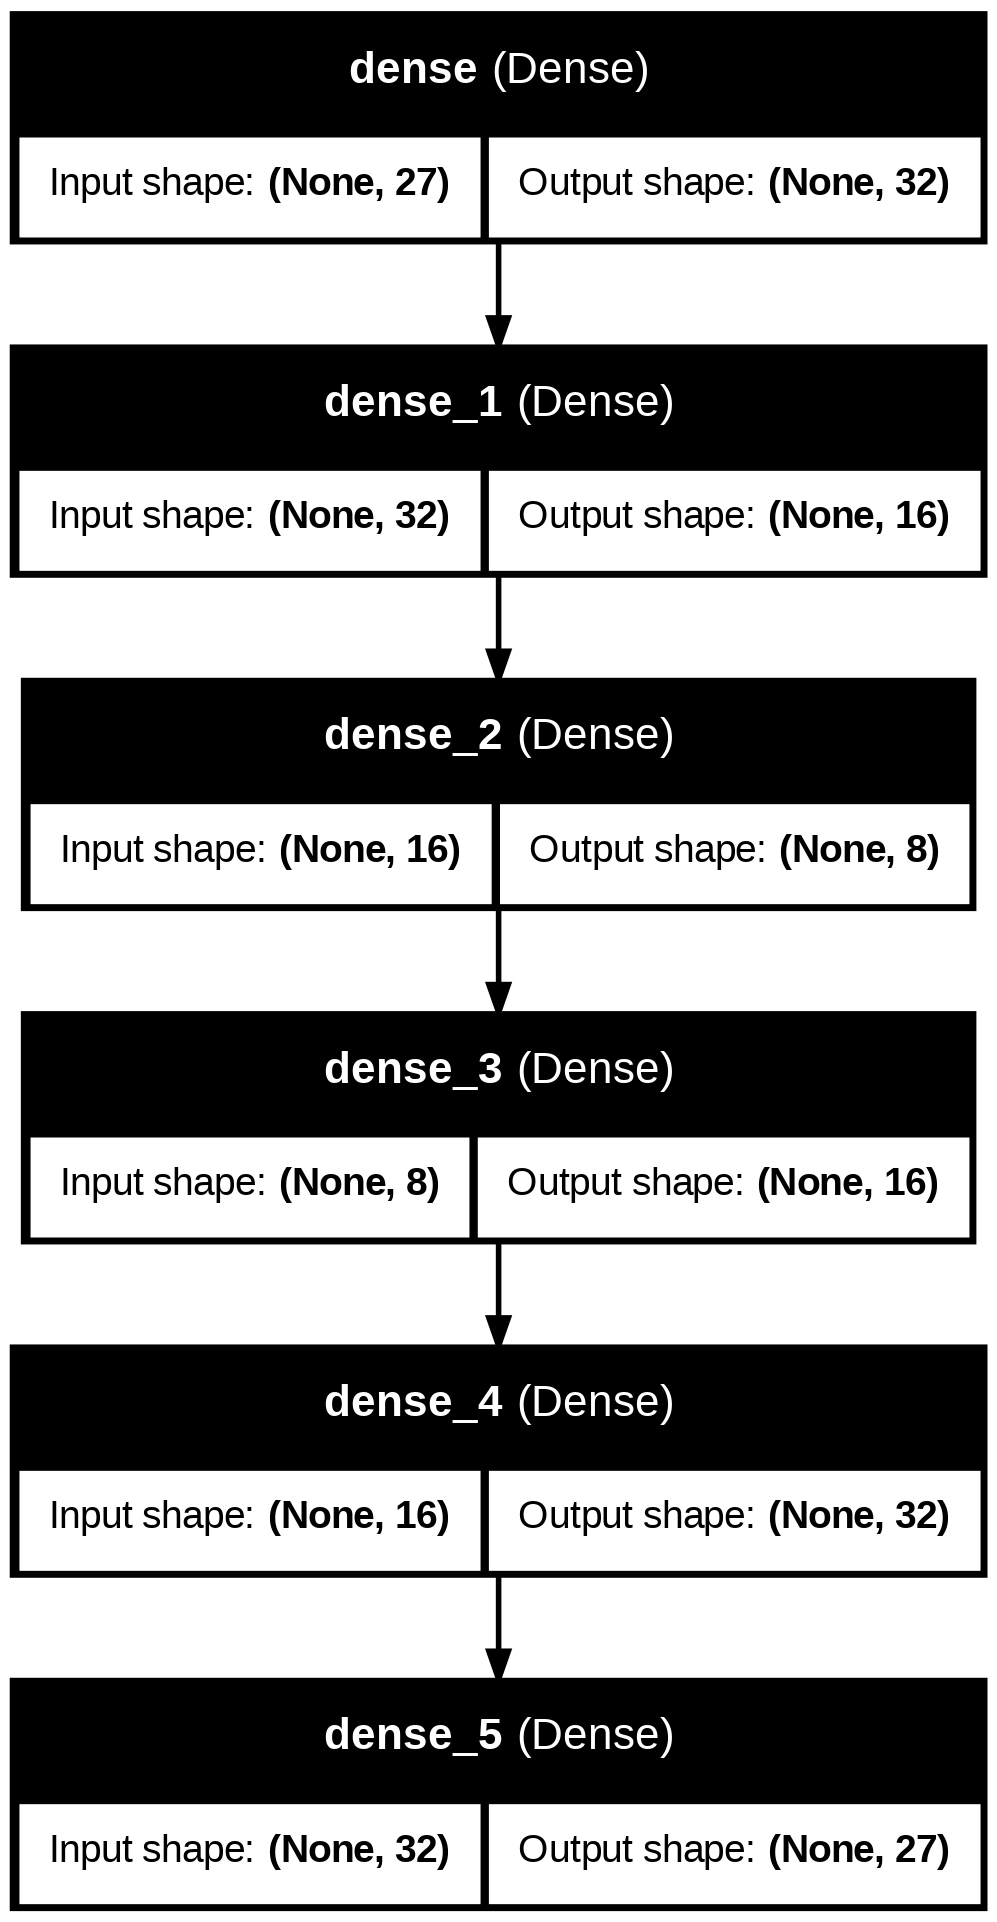

In [23]:
# Get input shape based on number of features
input_shape = X_train.shape[1]

# Autoencoder Model
autoencoder = Sequential([
    Input(shape=(input_shape,)),

    # Encoder layers
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),

    # Decoder layers
    Dense(16, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(input_shape, activation = 'linear')
])

# Show model architecture
plot_model(autoencoder, show_shapes = True, show_layer_names = True)

In [27]:
# Early stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-6
)

# Model checkpoints
checkpoint_filepath = ('/content/drive/MyDrive/Colab Notebooks/'
                      '530-IoT-Project/checkpoints/ckpt_{epoch:02d}.keras')
checkpoints = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = False,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True
)

In [30]:
# Compile the model
autoencoder.compile(optimizer = 'adam', loss = 'mse')

history = autoencoder.fit(
    X_train,
    X_train,
    epochs = 100,
    batch_size = 64,
    shuffle = False,
    validation_data = (X_val, X_val),
    callbacks = [early_stopping, lr_scheduler, checkpoints]
)

Epoch 1/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.5158 - val_loss: 0.3465 - learning_rate: 0.0010
Epoch 2/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2929 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 3/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.2255 - val_loss: 0.2301 - learning_rate: 0.0010
Epoch 4/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1929 - val_loss: 0.2134 - learning_rate: 0.0010
Epoch 5/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1809 - val_loss: 0.2024 - learning_rate: 0.0010
Epoch 6/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1730 - val_loss: 0.1948 - learning_rate: 0.0010
Epoch 7/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1674 - val_loss: 0.1877 - learning_rate: 0.0010
Epoch 8/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1629 - val_loss: 0.1833 - learning_rate: 0.0010
Epoch 9/100
5511/5511 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1565 - val_loss: 0.176

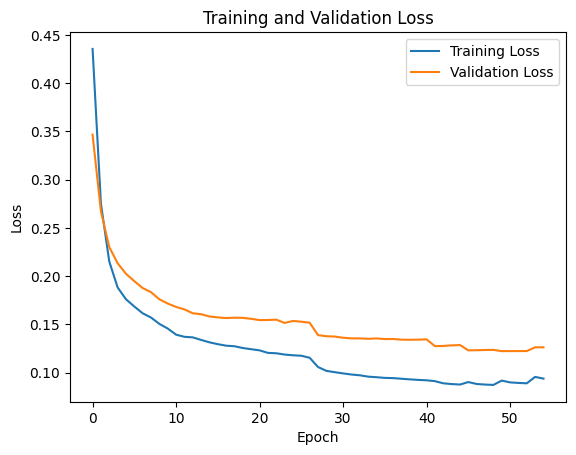

In [58]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Save the model
autoencoder.save('autoencoder_model.keras')

# Model Evaluation - Autoencoder

2362/2362 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
       reconstruction_error
count          75578.000000
mean               0.284614
std                0.226754
min                0.045565
25%                0.180892
50%                0.245109
75%                0.333403
max                8.842405


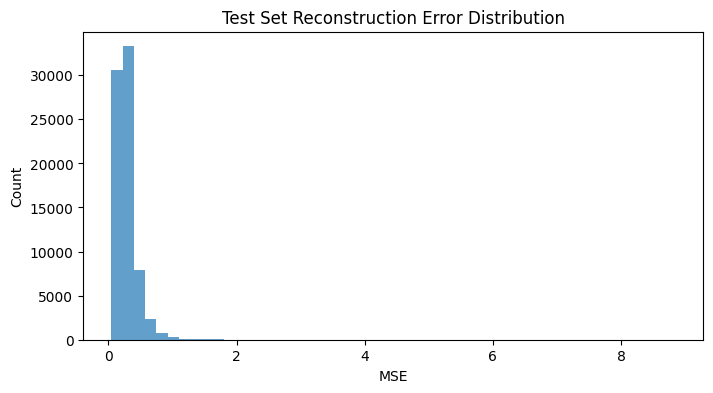

In [31]:
# Predict the reconstruction
X_test_pred = autoencoder.predict(X_test)

# Calculate MSE
mse_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Create dataframe of reconstruction errors
df_test_errors = pd.DataFrame({'reconstruction_error':mse_test})

# Inspect distribution
print(df_test_errors.describe())

# Plot the distribution
plt.figure(figsize = (8,4))
plt.hist(df_test_errors['reconstruction_error'], bins = 50, alpha = 0.7)
plt.title('Test Set Reconstruction Error Distribution')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.show()

In [38]:
# Set anomaly threshold to 99th percentile
threshold = np.percentile(mse_test, 99)

# Flag Anomalies
anomalies = df_test_errors['reconstruction_error'] > threshold
df_test_errors['anomaly'] = anomalies.astype(int)

In [39]:
# Reinsert datetime to dataframes for analysis
X_test['datetime'] = df_work.loc[X_test.index, 'datetime']
df_test_errors['datetime'] = X_test['datetime'].values

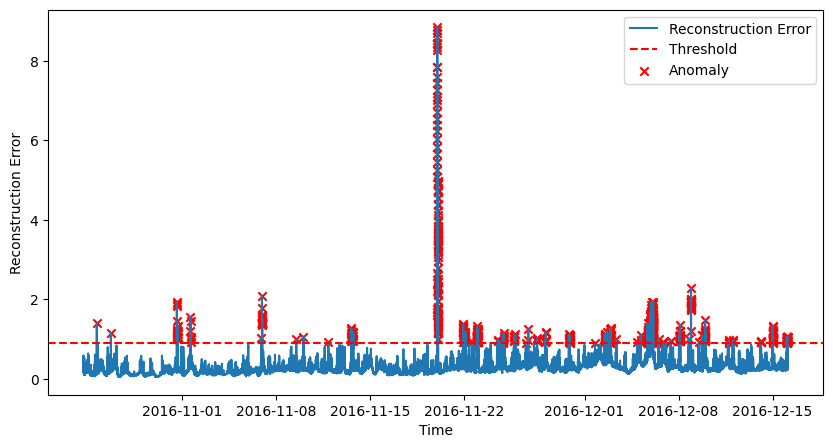

In [40]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(df_test_errors['datetime'], df_test_errors['reconstruction_error'], label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Mark anomalies
anomalies = df_test_errors[df_test_errors['anomaly'] == 1]
plt.scatter(
    anomalies['datetime'],
    anomalies['reconstruction_error'],
    color='red',
    marker='x',
    label='Anomaly'
)
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()

In [45]:
# Create "date" column to inspect anomaly detection by day
df_test_errors['date'] = df_test_errors['datetime'].dt.date

# Group by date and count anomalies
anomalies_per_day = df_test_errors.groupby('date')['anomaly'].sum()

# Identify top 5 dates with most anomalies
top_5 = anomalies_per_day.nlargest(5)
print('Top 5 dates with most anomalies:')
print(top_5)

Top 5 dates with most anomalies:
date
2016-12-05    192
2016-11-20    110
2016-12-06     99
2016-12-16     43
2016-11-22     41
Name: anomaly, dtype: int64


In [74]:
energy_features = [
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

# Find absolute error of test values and predictions
X_test = X_test.drop('datetime', axis = 1)
errors = np.abs(X_test - X_test_pred)

# Create Dataframe with the absolute errors for each feature
df_errors = pd.DataFrame(errors, columns = energy_features)

In [113]:
# Compute per-feature thresholds from training data
train_pred = autoencoder.predict(X_train)
train_errors = np.abs(X_train - train_pred)
df_train_errors = pd.DataFrame(train_errors, columns = energy_features)
thresholds = {}
for col in energy_features:
  thresholds[col] = np.percentile(df_train_errors[col], 99)

11022/11022 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [115]:
# Build dataframe with timestamps to store final results
df_test = pd.DataFrame(index=X_test.index)
df_test['datetime'] = df_work.loc[X_test.index, 'datetime'].values

# Add error columns and anomaly columns
for col in energy_features:
  df_test[f'{col}_error'] = df_errors[col]
  df_test[f'{col}_anomaly'] = (df_test[f'{col}_error'] > thresholds[col]).astype(int)



In [116]:
# Add Furnace 1 and Furnace 2 to one column
df['Total Furnace'] = df['Furnace 1 [kW]'] + df['Furnace 2 [kW]']

# Features to grab raw data from
features_to_include = [
    'datetime',
    'House overall [kW]',
    'Total Furnace',
    'Home office [kW]',
    'Fridge [kW]',
    'Wine cellar [kW]',
    'Living room [kW]',
]

# Merge raw data into test dataframe
df_test = pd.merge(
    df_test,
    df[features_to_include],
    on = 'datetime',
    how = 'left'
)

df_test.head()

,datetime,House overall [kW]_error,House overall [kW]_anomaly,Total Furnace_error,Total Furnace_anomaly,Home office [kW]_error,Home office [kW]_anomaly,Fridge [kW]_error,Fridge [kW]_anomaly,Wine cellar [kW]_error,Wine cellar [kW]_anomaly,Living room [kW]_error,Living room [kW]_anomaly,House overall [kW],Total Furnace,Home office [kW],Fridge [kW],Wine cellar [kW],Living room [kW]
0,2016-10-24 15:52:00,0.123048,0,0.924651,0,0.226363,0,0.855078,0,0.258895,0,0.077104,0,0.843817,0.622083,0.063750,0.004683,0.007783,0.093033
1,2016-10-24 15:53:00,0.157944,0,0.597066,0,0.132572,0,0.756675,0,0.143102,0,0.466104,0,0.440400,0.222200,0.066650,0.004967,0.007867,0.093200
2,2016-10-24 15:54:00,0.270365,0,0.547225,0,0.111406,0,0.789025,0,0.155245,0,0.316798,0,0.572617,0.218900,0.063017,0.004950,0.007867,0.093350
3,2016-10-24 15:55:00,0.159709,0,0.592396,0,0.108971,0,0.744249,0,0.142405,0,0.476335,0,0.442733,0.219933,0.063883,0.005000,0.007850,0.093467
4,2016-10-24 15:56:00,0.128495,0,0.596644,0,0.074032,0,0.711571,0,0.138342,0,0.535553,0,0.413233,0.219717,0.060300,0.005000,0.007783,0.094067


In [122]:
# Save dataframe
df_test.to_csv('df_test.csv')

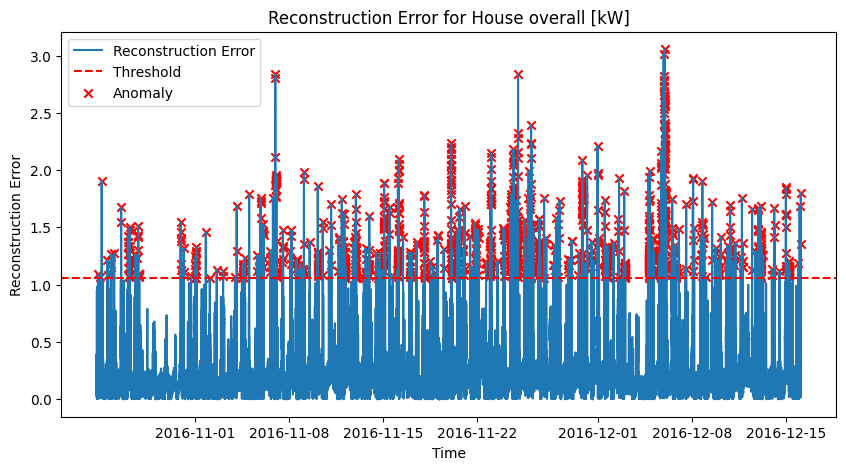

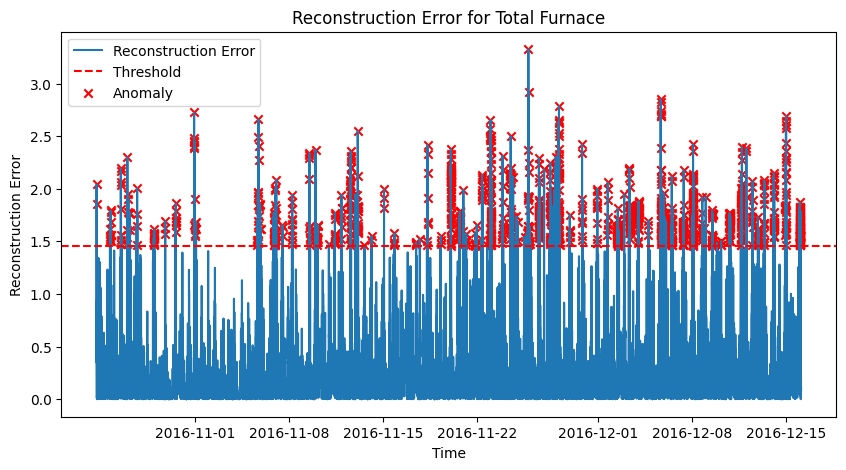

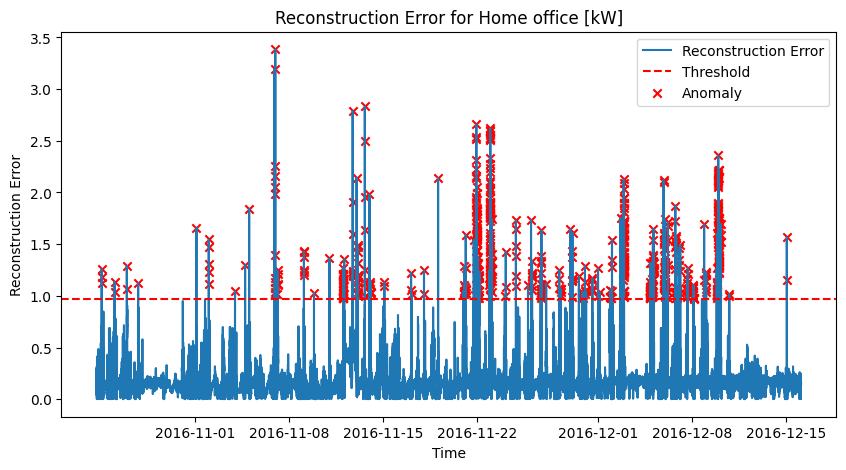

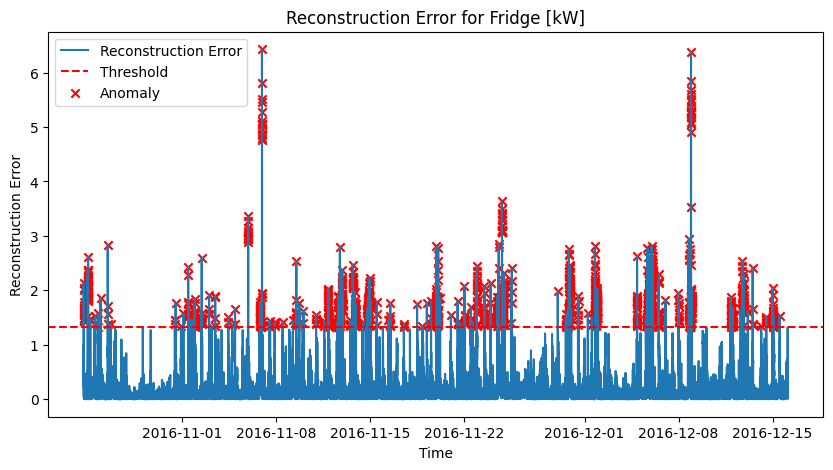

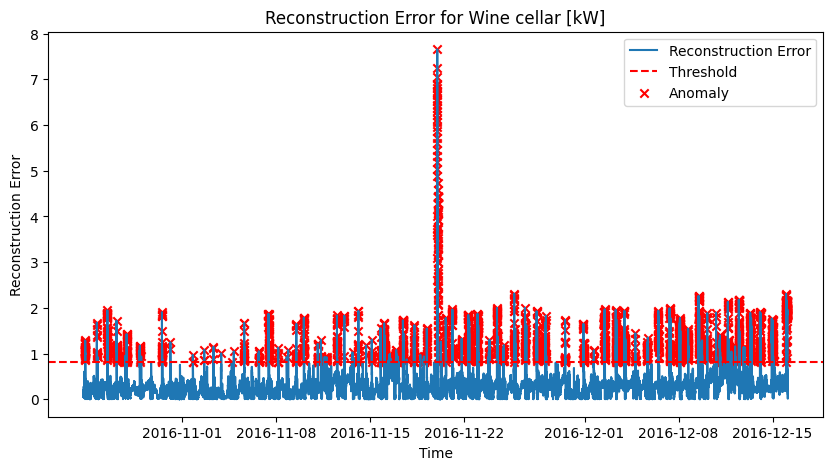

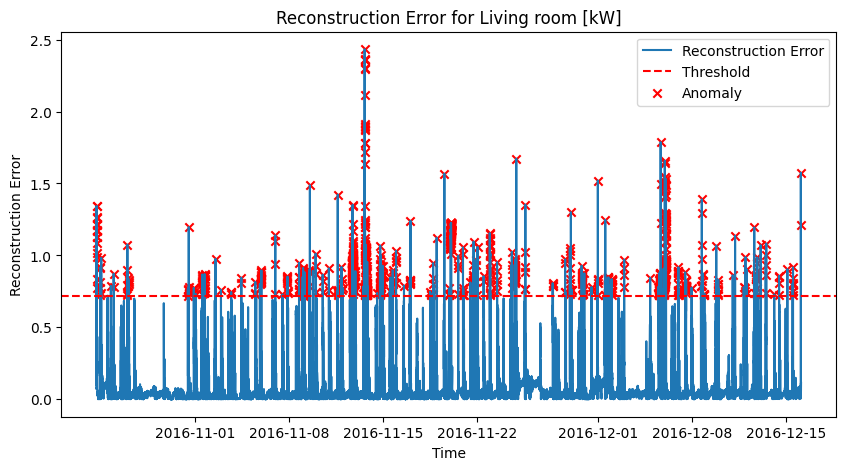

In [117]:
for col in energy_features:
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(df_test['datetime'], df_test[f'{col}_error'], label='Reconstruction Error')
    plt.axhline(y=thresholds[col], color='red', linestyle='--', label='Threshold')

    # Mark anomalies
    anomalies = df_test[df_test[f'{col}_anomaly'] == 1]
    plt.scatter(
        anomalies['datetime'],
        anomalies[f'{col}_error'],
        color='red',
        marker='x',
        label='Anomaly'
    )

    plt.title(f'Reconstruction Error for {col}')
    plt.xlabel("Time")
    plt.ylabel("Reconstruction Error")
    plt.legend()
    plt.show()

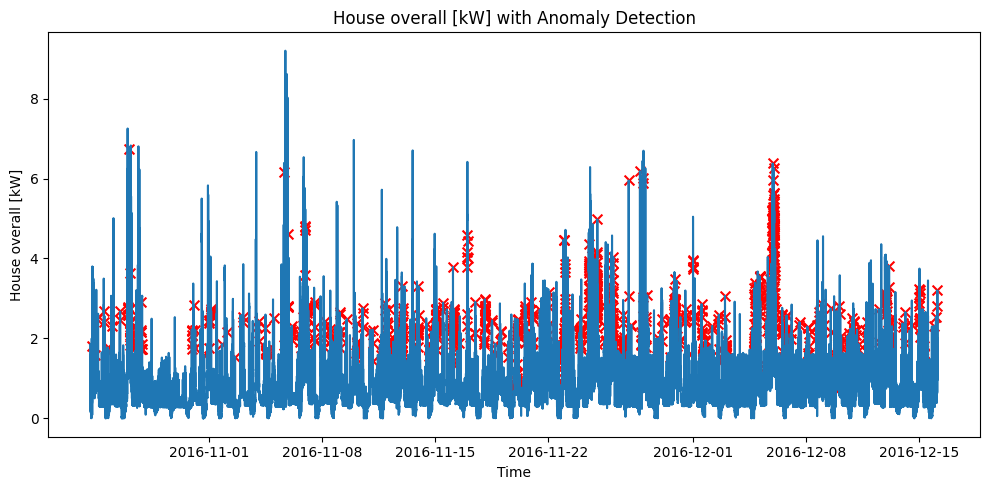

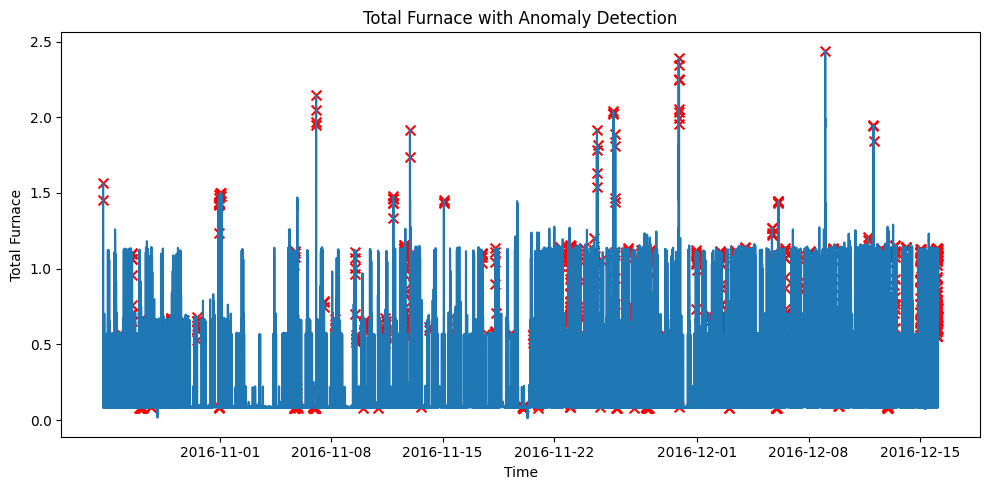

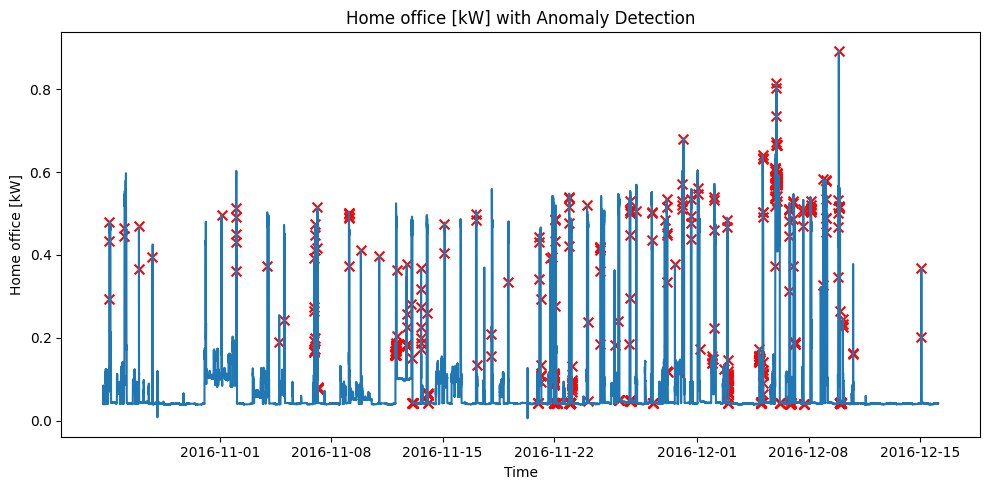

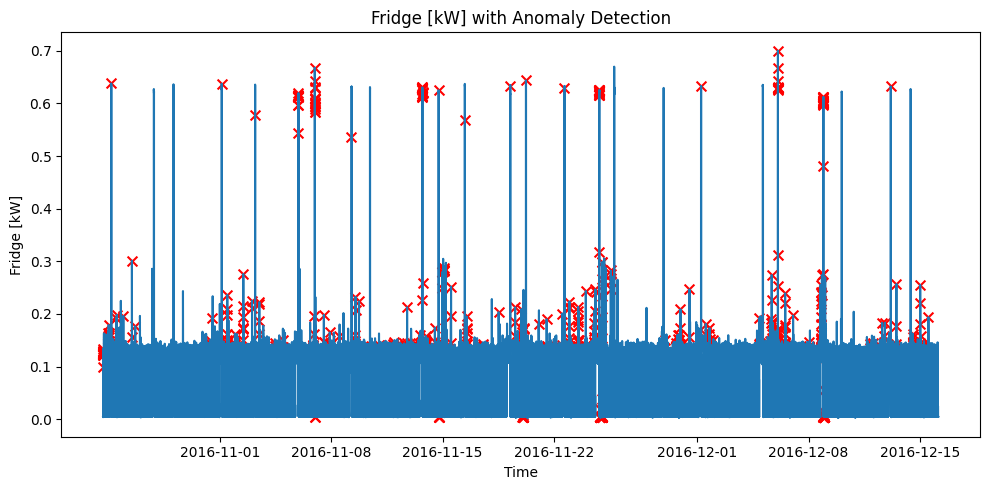

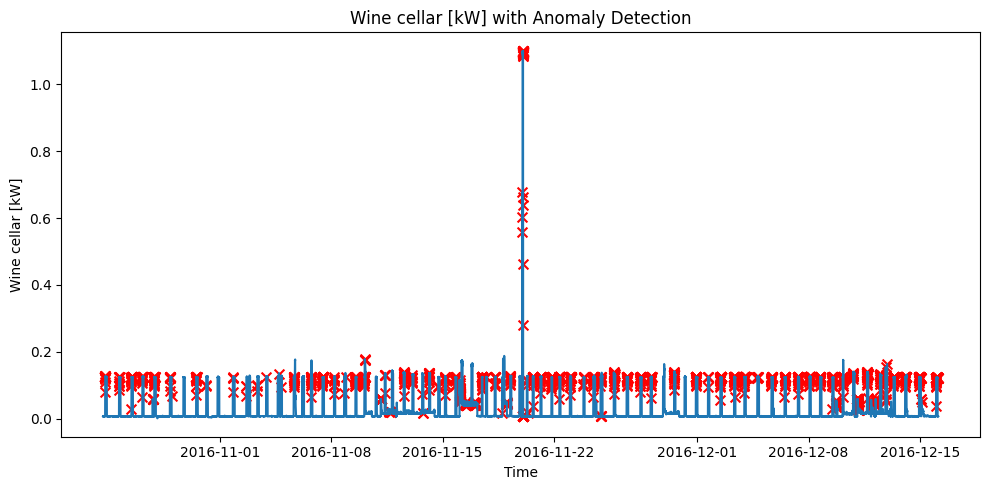

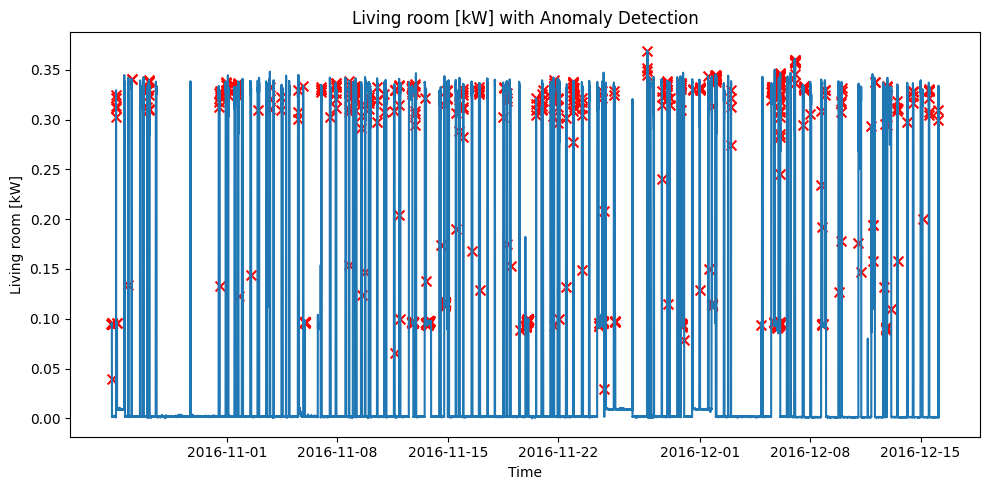

In [118]:
# Create line plots for each feature
for col in energy_features:
  plt.figure(figsize = (10,5))
  plt.plot(df_test['datetime'], df_test[col], label = col)

  # Flag anomalies on the plot
  anomalies = df_test[df_test[f'{col}_anomaly'] == 1]

  # Plot anomalies as red X markers
  plt.scatter(
      anomalies['datetime'],
      anomalies[col],
      color = 'red',
      marker = 'x',
      s = 50,
      label = 'Anomaly'
  )

  plt.title(f'{col} with Anomaly Detection')
  plt.xlabel('Time')
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()


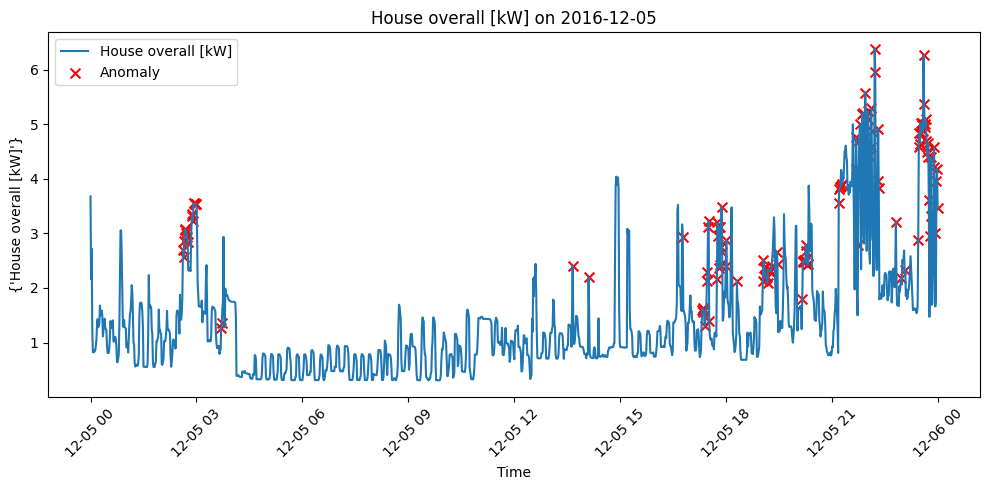

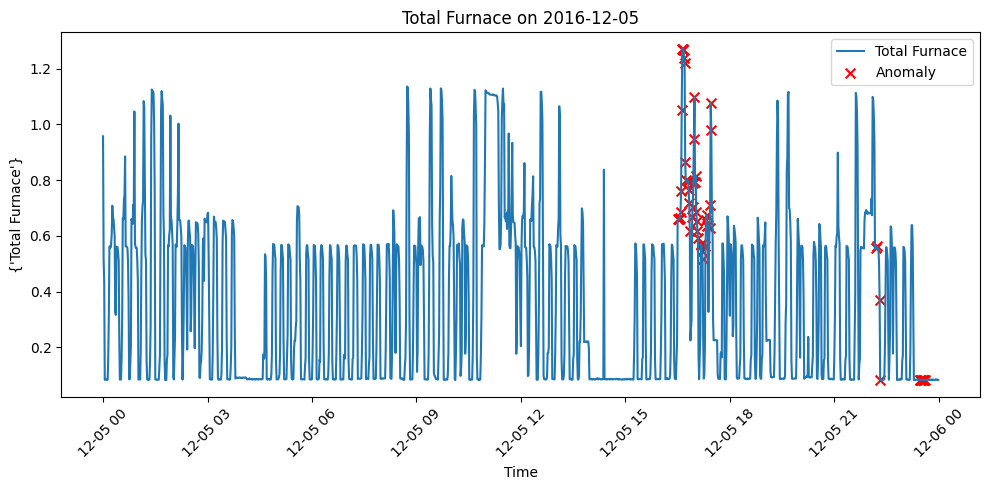

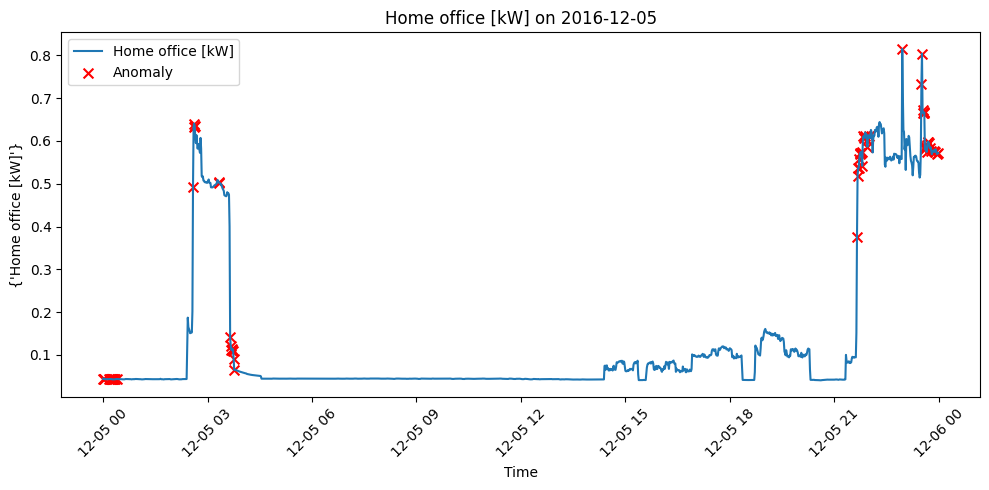

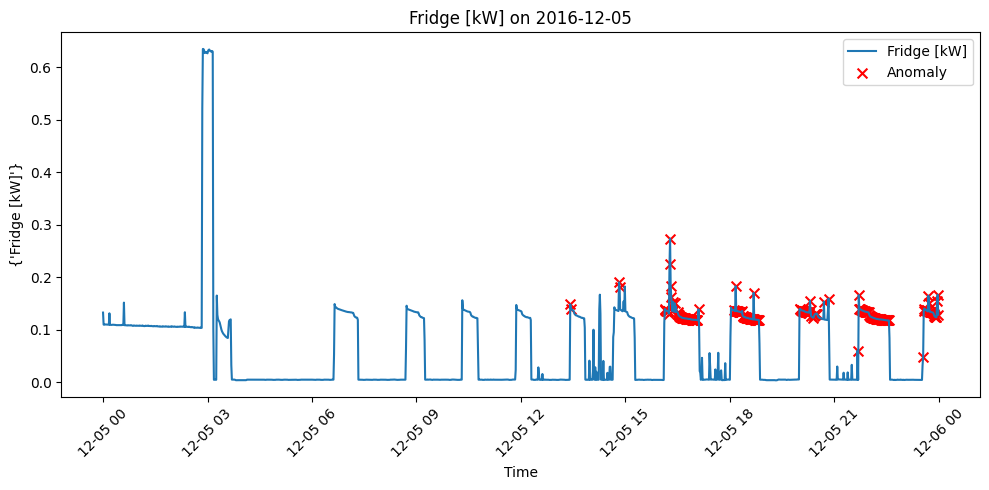

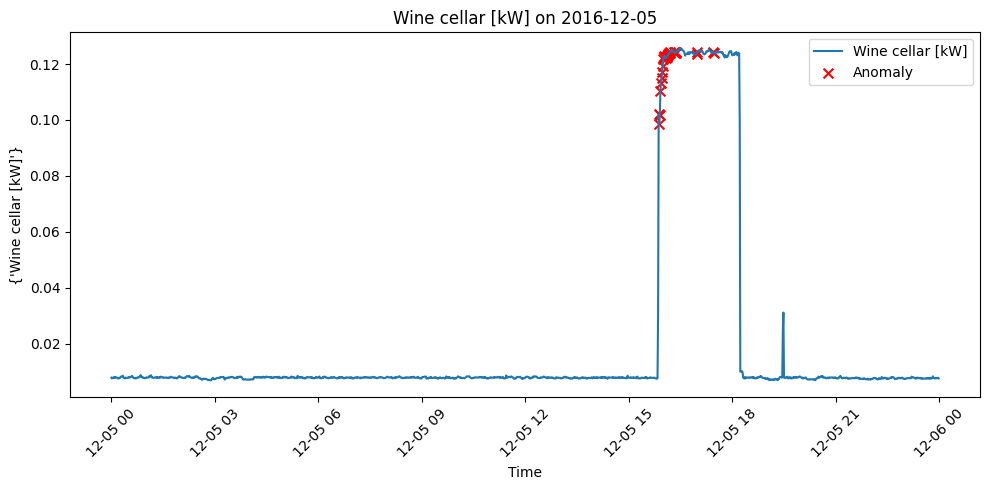

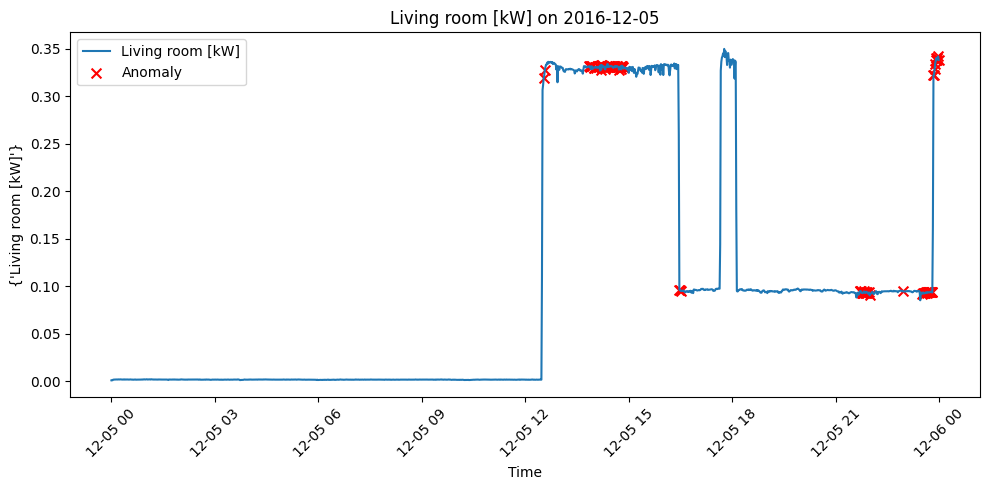

In [123]:
# Boolean mask for date with most anomalies detected: 2016-12-05
date_start = '2016-12-05'
date_end = '2016-12-06'
mask = (
    (df_test['datetime'] >= date_start) &
    (df_test['datetime'] < date_end)
)

# Plot energy consumption data for 2016-12-05
for col in energy_features:
  plt.figure(figsize = (10,5))

  # Plot time series for rows matching target date
  plt.plot(
      df_test.loc[mask, 'datetime'],
      df_test.loc[mask, col],
      label = col
  )

  # Flag anomalies on target date
  anomaly_mask = mask & (df_test[f'{col}_anomaly'] == 1)
  plt.scatter(
      df_test.loc[anomaly_mask, 'datetime'],
      df_test.loc[anomaly_mask, col],
      color = 'red',
      marker = 'x',
      s = 50,
      label = 'Anomaly'
  )

  plt.title(f'{col} on 2016-12-05')
  plt.xlabel('Time')
  plt.ylabel({col})
  plt.xticks(rotation = 45)
  plt.legend()
  plt.tight_layout()
  plt.show()